<a href="https://colab.research.google.com/github/VishalDhore005/Capstone_Project/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('/content/Hotel Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [4]:
df.children.unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [5]:
# Columns having missing values.
df.isnull().sum().sort_values(ascending = False)    

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [25]:
df["children"].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. \ So, 'nan' values are the missing values due to error of recording data. \ \ We will replace the null values under this column with mean value of children.

In [27]:
df['children'].fillna(df['children'].mean(), inplace = True)

In [24]:
df["agent"].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [28]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

Next column with missing value is 'country'. This column represents the country of oriigin of customer. \ Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [29]:
df['country'].fillna('others', inplace = True)

Since, company and agent columns have so many number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. \ We will replace null values by 0 in these columns

In [6]:
df[['company', 'agent']].fillna(0)

,company,agent
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,304.0
4,0.0,240.0
...,...,...
119385,0.0,394.0
119386,0.0,9.0
119387,0.0,9.0
119388,0.0,89.0


In [48]:
m =df['agent'].isnull().sum()
d1.drop(d1[d1['agent'] == 0].index, inplace = True)  

16340

In [22]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [9]:
df['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [10]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [8]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

**Converting columns to appropriate datatypes.**

# changing datatype of column 'reservation_status_date' to data_type.


In [32]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

In [58]:
df[df['adults']+df['babies']+df['children'] == 0].shape
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

In [33]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

**Q1) Which agent makes most no. of bookings**?

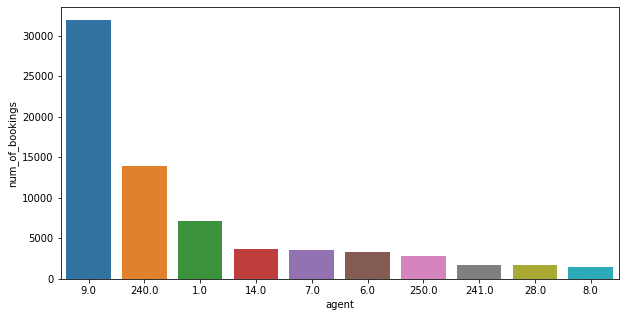

In [78]:
d1 = pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'})
d1.drop(d1[d1['agent'] == 0].index, inplace = True)
d1 = d1[:10]  
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

**Q2) Which room type is in most demand and which room type generates highest adr?**

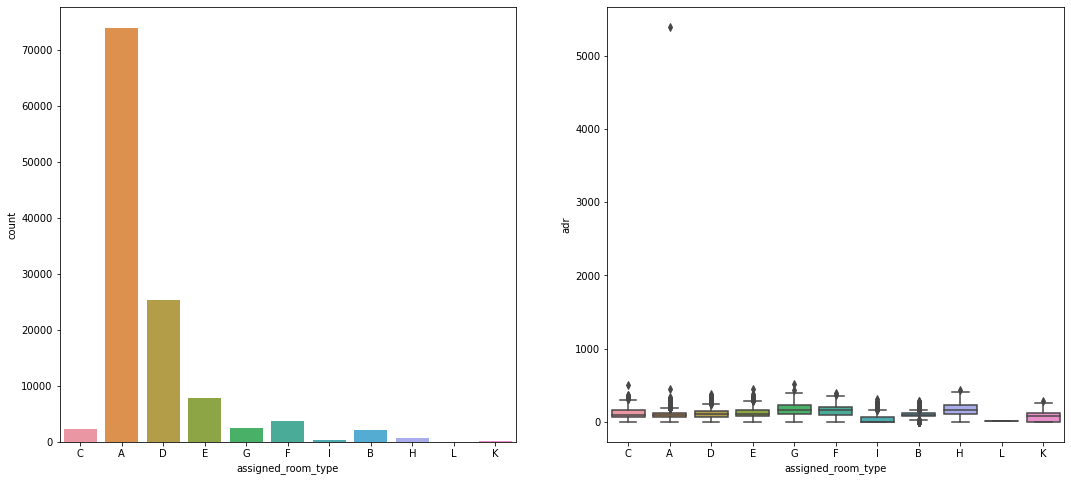

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df['assigned_room_type'], y = df['adr'])
plt.show()

**Q3) Which meal type is most preffered meal of customers?**

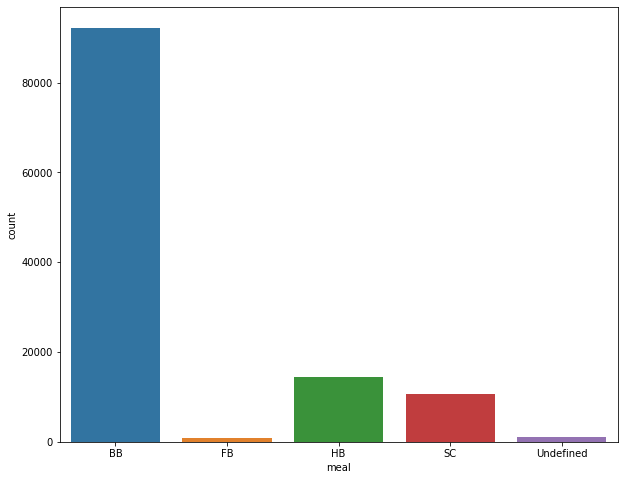

In [69]:
plt.figure( figsize=(10, 8))

sns.countplot(x = df['meal'])
plt.show()

 **Hotel wise analysis**





Q4) What is percentage of bookings in each hotel?

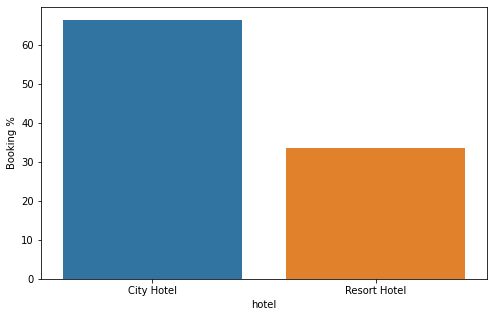

In [72]:
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

**Q5) Which hotel has high chance that its customer will return for another stay?**

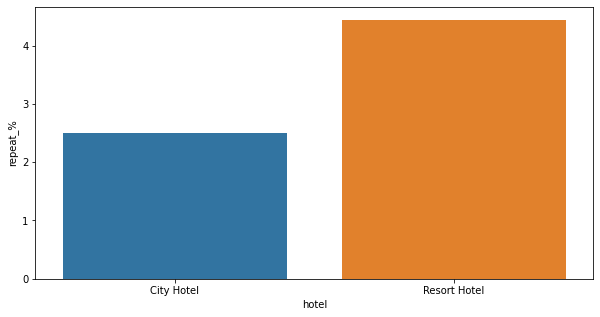

In [73]:
# Selecting and counting repeated customers bookings
repeated_data = df[df['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

**Q6) Which is the most common channel for booking hotels?**

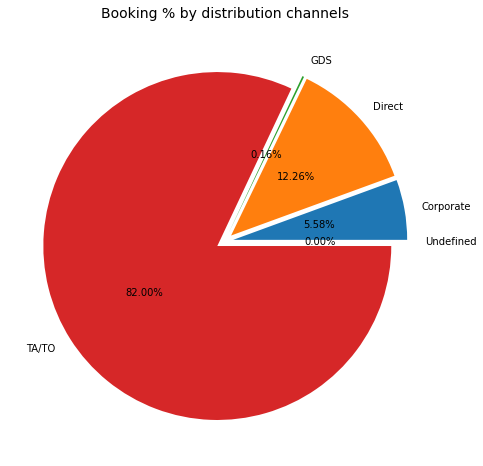

In [74]:
group_by_dc = df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

**Q7) Which channel is mostly used for early booking of hotels?**

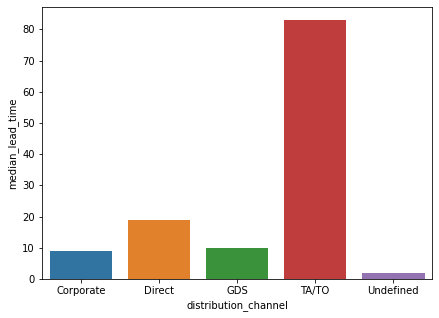

In [75]:
group_by_dc = df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

**Q8) Which hotel has higher bookings cancellation rate.**

In [76]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,33079,79163,41.79
Resort Hotel,11120,40047,27.77


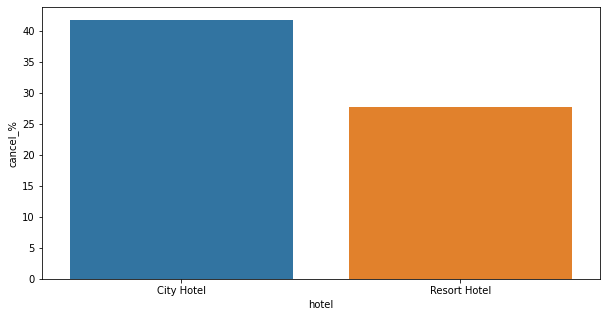

In [77]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()